In [3]:
import sys
import pickle
import importlib

sys.path.append('..')
#from utils import data_handler
from src.utils import data_handler

#### 0. BRCA

In [ ]:
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    LS_threshold= 0.0020,
    MAD_threshold = 1, 
    MT_removal= True, expression_threshold= 0.1, keep_only_protein_coding = False, verbose = 1)

with open('../workfiles/light_BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    MAD_threshold = 1, MT_removal= True, expression_threshold= 0.1, keep_only_protein_coding = False, verbose = 1)

with open('../workfiles/BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

### Generate all datasets necessary for experiments and pickle them

#### 1. Genomic datasets

not applying any filtering over phases
retaining all patient who have at least passed the Base Line Visit...
1521
loading samples...
loaded 1521 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1517 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


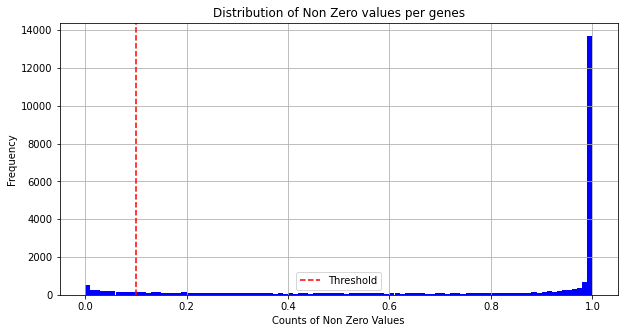

removing 9286 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 2.87169e-07
treshold: 2
max MAD 4327.33


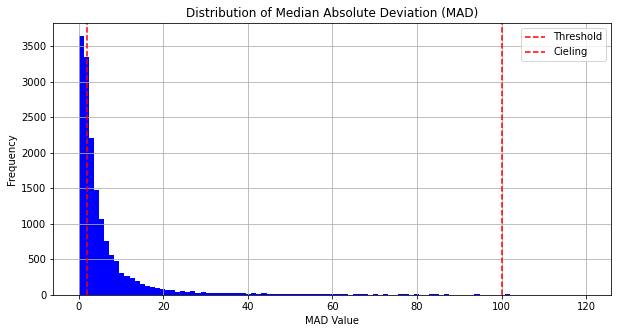

removing 6266 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0027 ...
min LS 0.0021799740105638782
max LS 0.0206012689843833


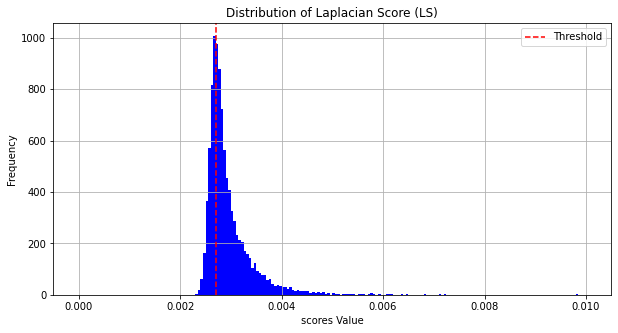

removing 3011 genes under the LS threshold from the dataset
number of genes selected :  6968
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 1521
keeping sample as is, no conversion to time series


In [3]:
data, metadata = data_handler.generate_dataset_genes(
    LS_threshold= 0.0027,
    MAD_threshold = 2,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    time_point="BL",
    verbose = 1,

    )


with open('../workfiles/PPMI_genes.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

gene selected with only MAD threshold of 2 : 11835

not applying any filtering over phases
retaining all patient who have at least passed the BL Visit...
1521
loading samples...
loaded 755 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1515 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


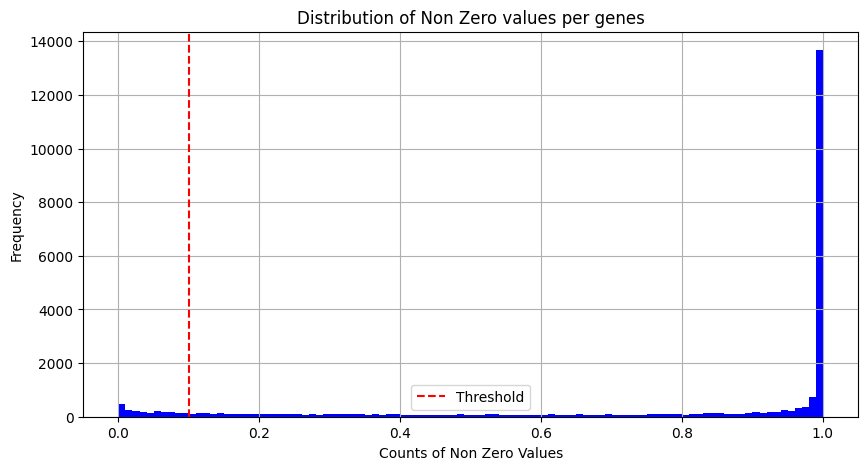

removing 9299 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 5.7433e-07
treshold: 2
max MAD 4804.580000000001


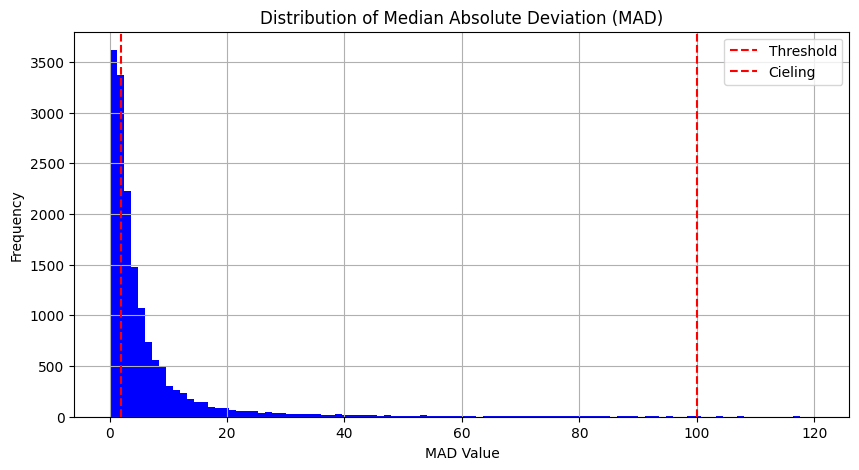

removing 6259 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.005 ...
min LS 0.0038450070147264554
max LS 0.02964412212570243


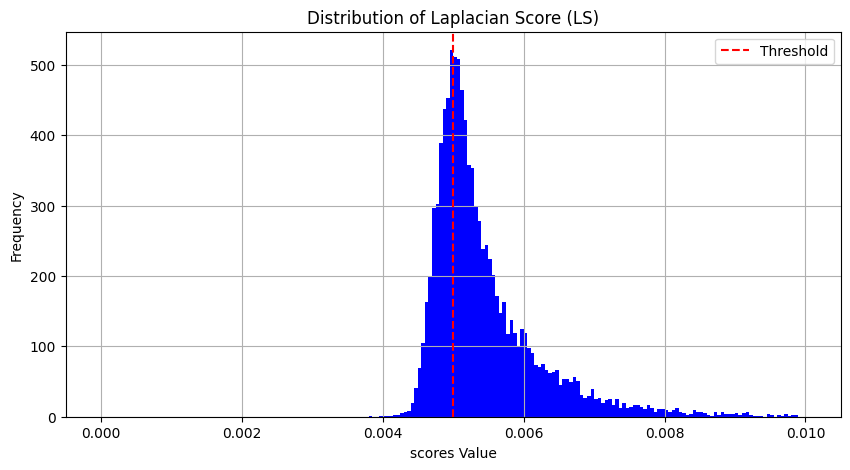

removing 3024 genes under the LS threshold from the dataset
number of genes selected :  6951
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 755
keeping sample as is, no conversion to time series


In [18]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_genes(
    time_point="BL",
    LS_threshold= 0.005,
    MAD_threshold = 2,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    verbose = 1,
    only_pd=True
    )


with open('../workfiles/PPMI_genes_PD_BL.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

not applying any filtering over phases
retaining all patient who have at least passed the V02 Visit...
853
loading samples...
loaded 420 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1511 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


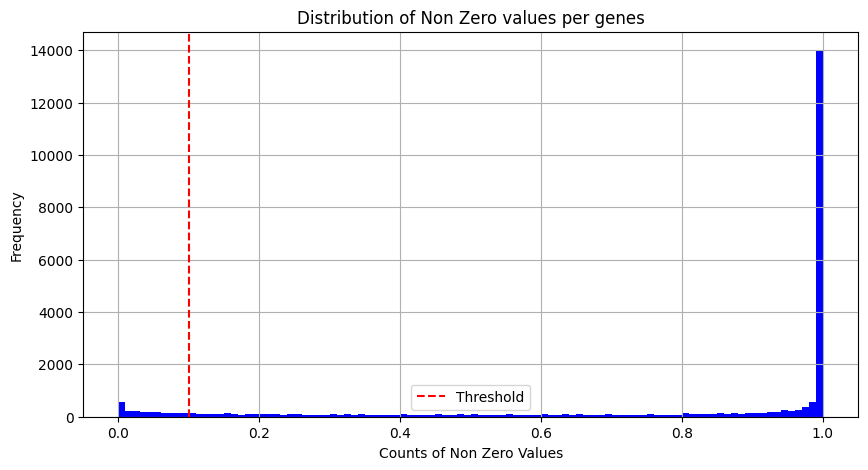

removing 9175 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 1.2028533150000001e-06
treshold: 2
max MAD 14929.874499999998


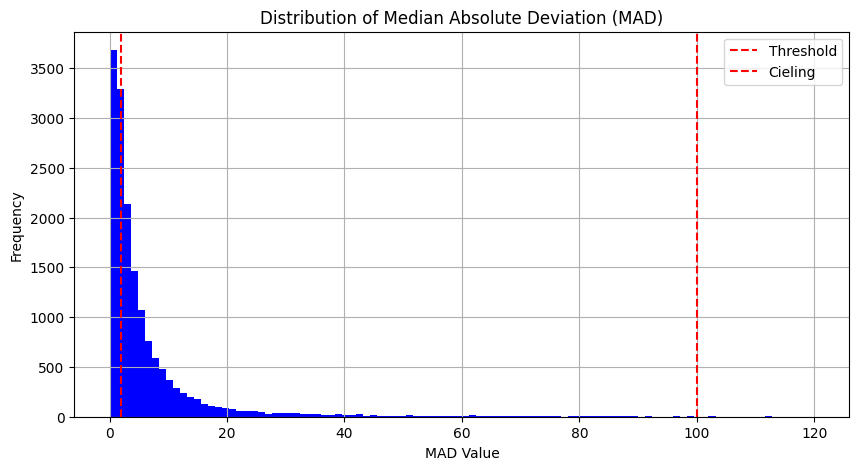

removing 6243 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0078 ...
min LS 0.006009593593619789
max LS 0.022629080630370352


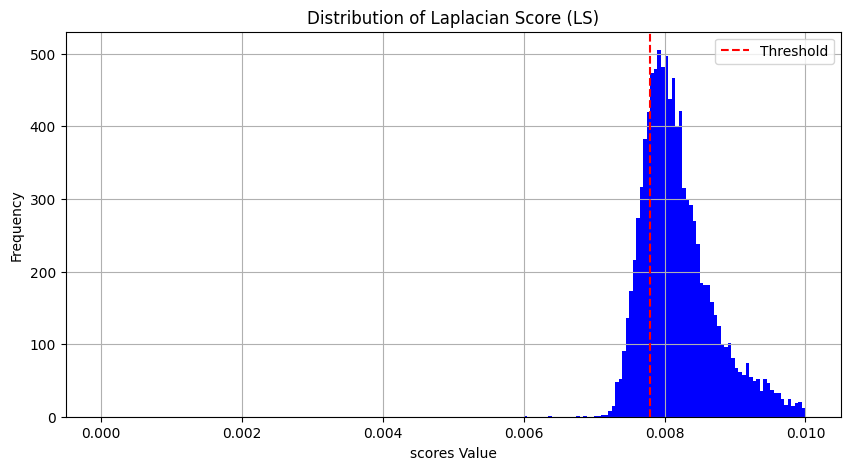

removing 2143 genes under the LS threshold from the dataset
number of genes selected :  7976
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 420
keeping sample as is, no conversion to time series


In [20]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_genes(
    time_point="V02",
    LS_threshold= 0.0078,
    MAD_threshold = 2,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    verbose = 1,
    only_pd=True
    )


with open('../workfiles/PPMI_genes_PD_V02.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

not applying any filtering over phases
retaining all patient who have at least passed the V04 Visit...
874
loading samples...
loaded 466 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1514 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


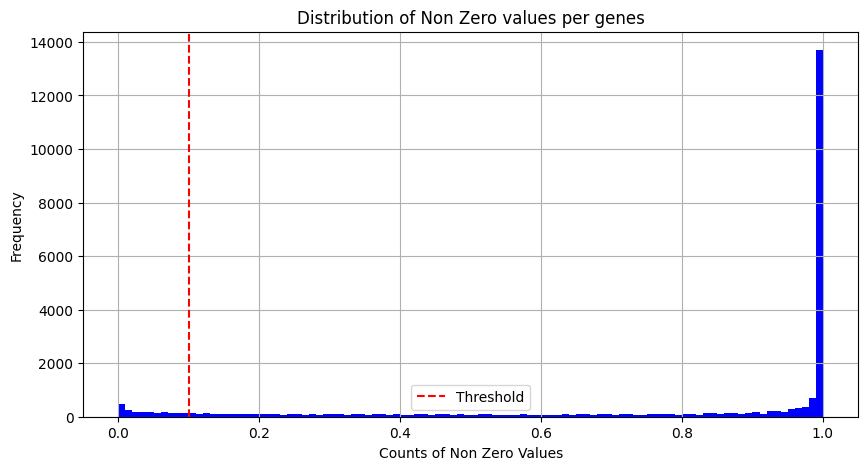

removing 9314 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 6.7424e-07
treshold: 2
max MAD 5359.585


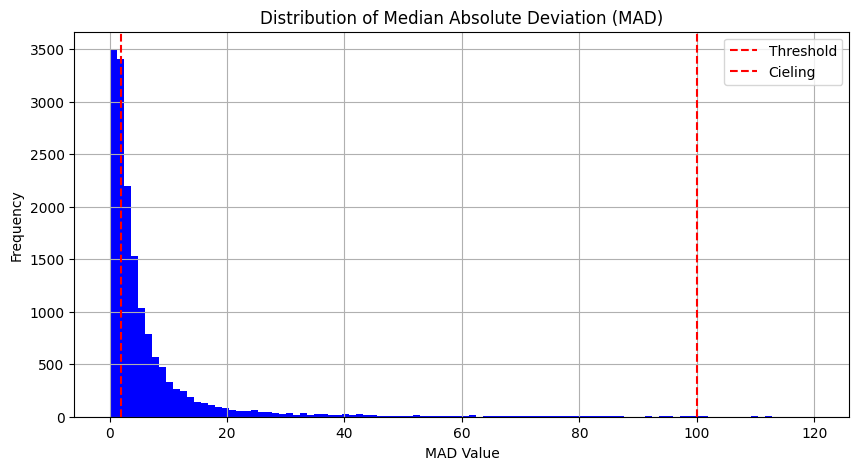

removing 6168 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.007 ...
min LS 0.005852843884940086
max LS 0.03819820241652098


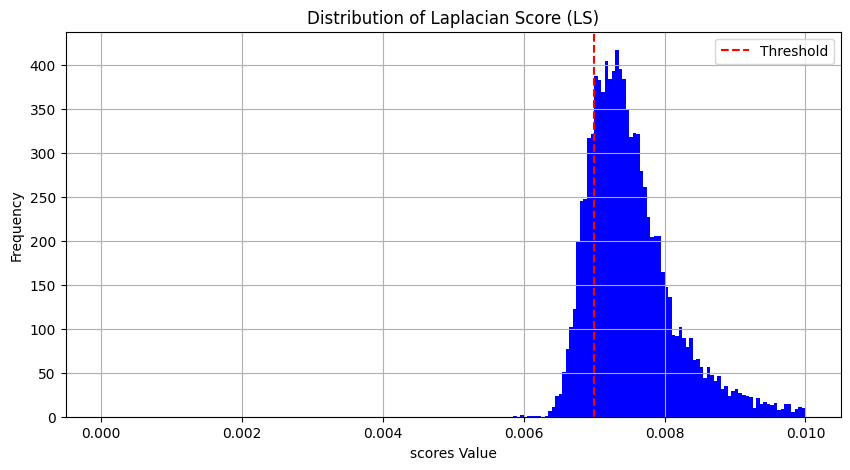

removing 1758 genes under the LS threshold from the dataset
number of genes selected :  8294
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 466
keeping sample as is, no conversion to time series


In [23]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_genes(
    time_point="V04",
    LS_threshold= 0.007,
    MAD_threshold = 2,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    verbose = 1,
    only_pd=True
    )


with open('../workfiles/PPMI_genes_PD_V04.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

not applying any filtering over phases
retaining all patient who have at least passed the V06 Visit...
834
loading samples...
loaded 459 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1514 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


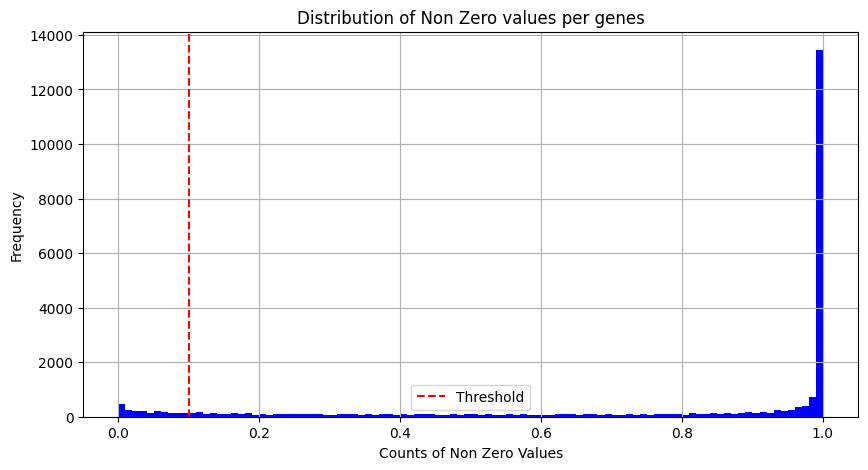

removing 9501 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 4.00187e-07
treshold: 2
max MAD 5386.299999999999


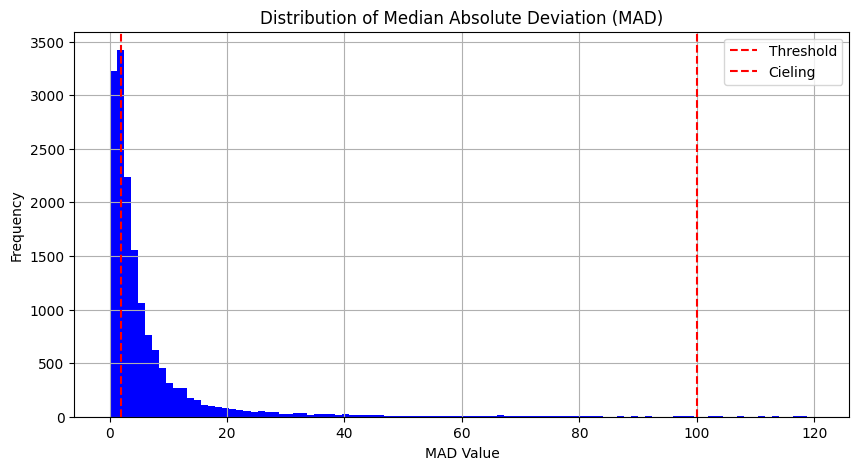

removing 5880 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0075 ...
min LS 0.005787694417003953
max LS 0.031856505030401334


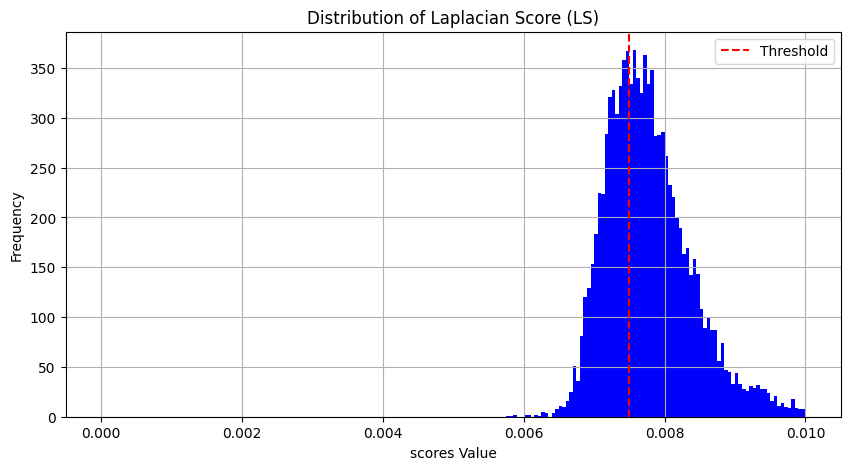

removing 3590 genes under the LS threshold from the dataset
number of genes selected :  6563
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 459
keeping sample as is, no conversion to time series


In [25]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_genes(
    time_point="V06",
    LS_threshold= 0.0075,
    MAD_threshold = 2,
    MT_removal= True,
    expression_threshold= 0.1,
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    verbose = 1,
    only_pd=True
    )


with open('../workfiles/PPMI_genes_PD_V06.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

not applying any filtering over phases
retaining all patient who have at least passed the V08 Visit...
538
loading samples...
loaded 346 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1512 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


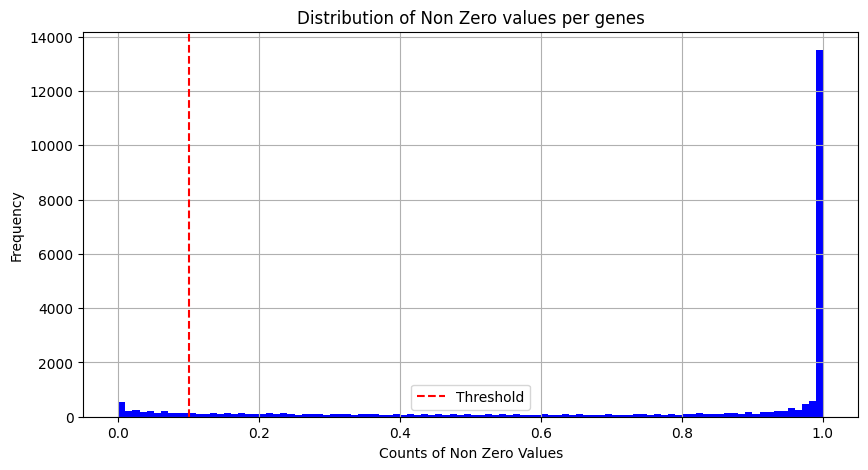

removing 9506 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 4.4245490000000003e-07
treshold: 2
max MAD 5796.365


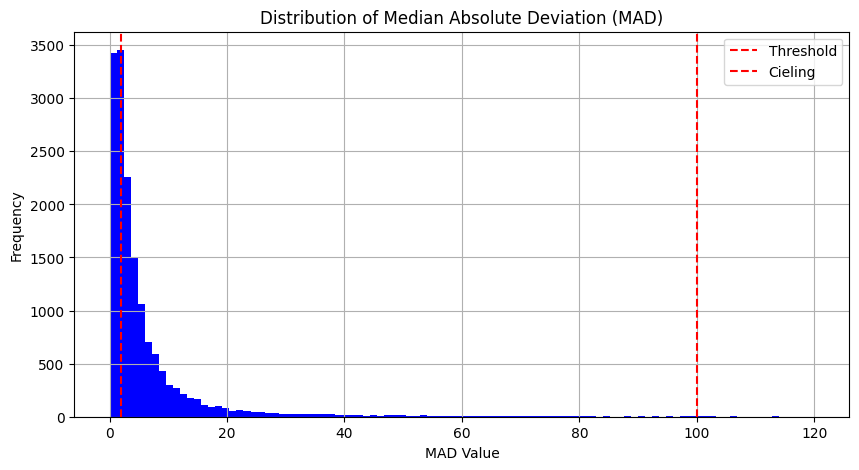

removing 6141 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.009 ...
min LS 0.0070531866667082315
max LS 0.03954921679070137


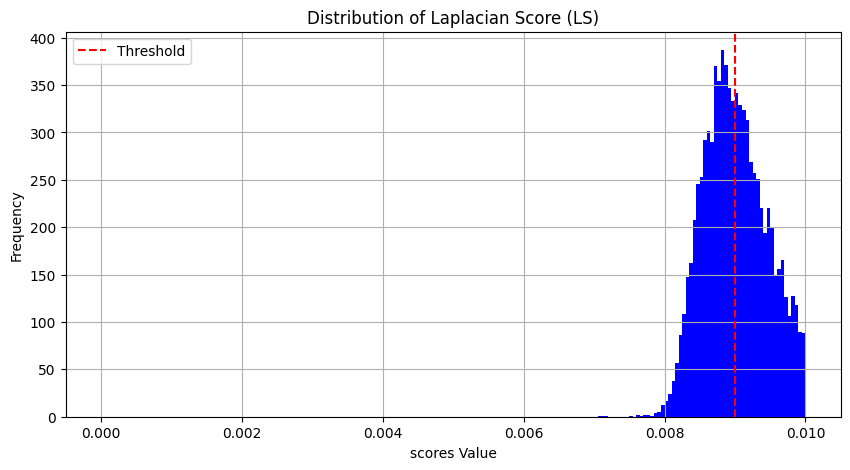

removing 4425 genes under the LS threshold from the dataset
number of genes selected :  5464
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 346
keeping sample as is, no conversion to time series


In [27]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_genes(
    time_point="V08",
    LS_threshold= 0.009,
    MAD_threshold = 2,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    verbose = 1,
    only_pd=True
    )


with open('../workfiles/PPMI_genes_PD_V08.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

### 2. Trasnscriptomic dataset

In [ ]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_transcripts(
    MAD_threshold = 1,
    #verbose = 1
    )

with open('../workfiles/PPMI_transcript.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)